In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import swarmplot
from pathlib import Path
import datetime
from ydata_profiling import ProfileReport
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pmdarima as pm
#from fbprophet import Prophet

import xgboost as xgb


from pandas import to_datetime
from pmdarima.model_selection import train_test_split
from numpy import *

from sklearn import datasets, linear_model
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr

%matplotlib inline

import random
from numpy import * 
from sklearn.metrics import roc_curve, auc

import itertools
import warnings
import time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error


warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [55]:
def load_demand_full_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/model_data.csv"))

In [56]:
dem_data = load_demand_full_data()

In [57]:
dem_data.head()

,Year,Month,temp_mean,temp_min,temp_max,demand_mean,total_consumption,demand_max,demand_mean_max,pv_capacity,population,gsp
0,2010,1,20.868008,1.6,41.1,8941.450389,6554083.135,13765.04,10613.530000,28278.392,7110454,44504.25
1,2010,2,20.218907,3.2,35.4,8855.467677,5831325.465,13377.27,10380.667860,32153.986,7119405,44504.25
2,2010,3,19.828286,6.3,34.7,8698.725127,6319623.805,11991.47,10132.978710,38195.588,7128356,44504.25
3,2010,4,17.593856,6.5,29.9,8452.863411,5984627.295,11436.13,9804.072333,45142.723,7133668,44504.25
4,2010,5,15.323485,3.1,28.4,8897.770510,6459781.390,12386.49,10558.023550,54370.332,7138980,44504.25


In [58]:
demand = dem_data.drop([ 'Year', 'Month', 'temp_min', 'temp_max', 'demand_max'], axis=1)

In [59]:
demand.head()

,temp_mean,demand_mean,total_consumption,demand_mean_max,pv_capacity,population,gsp
0,20.868008,8941.450389,6554083.135,10613.530000,28278.392,7110454,44504.25
1,20.218907,8855.467677,5831325.465,10380.667860,32153.986,7119405,44504.25
2,19.828286,8698.725127,6319623.805,10132.978710,38195.588,7128356,44504.25
3,17.593856,8452.863411,5984627.295,9804.072333,45142.723,7133668,44504.25
4,15.323485,8897.770510,6459781.390,10558.023550,54370.332,7138980,44504.25


In [60]:
Meandemand = demand.drop(['total_consumption','demand_mean_max', 'gsp'], axis=1)

In [61]:
Meandemand.head()

,temp_mean,demand_mean,pv_capacity,population
0,20.868008,8941.450389,28278.392,7110454
1,20.218907,8855.467677,32153.986,7119405
2,19.828286,8698.725127,38195.588,7128356
3,17.593856,8452.863411,45142.723,7133668
4,15.323485,8897.770510,54370.332,7138980


In [62]:
MeanMaxdemand = demand.drop(['total_consumption','demand_mean', 'gsp'], axis=1)

In [63]:
MeanMaxdemand.head()

,temp_mean,demand_mean_max,pv_capacity,population
0,20.868008,10613.530000,28278.392,7110454
1,20.218907,10380.667860,32153.986,7119405
2,19.828286,10132.978710,38195.588,7128356
3,17.593856,9804.072333,45142.723,7133668
4,15.323485,10558.023550,54370.332,7138980


In [64]:
MeanMaxdemand.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/MeanMaxDemand.txt"),  sep=',', index=False, header=None)

In [65]:
datafile = "C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/MeanMaxDemand.txt"

In [79]:
def get_data(datafile, normalise, i): 

    data_in = genfromtxt(datafile, delimiter=",") # in case of csv data
 

    data_inputx = data_in[:,[0,2,3]]  # three features   

    if normalise == True:
        transformer = Normalizer().fit(data_inputx)  # fit does nothing.
        data_inputx = transformer.transform(data_inputx)
 


    data_inputy = data_in[:,1] # this is target - second column from the data

    percent_test = 0.4
    testsize = int(percent_test * data_inputx.shape[0]) 
    x_train = data_inputx[:-testsize]
    x_test = data_inputx[-testsize:] 
    y_train = data_inputy[:-testsize]
    y_test = data_inputy[-testsize:]


    #another way you can use scikit-learn train test split with random state
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=i)

    return x_train, x_test, y_train, y_test

In [80]:
def scikit_linear_mod(x_train, x_test, y_train, y_test): 
 
    regr = linear_model.LinearRegression()

 
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    rsquared = r2_score(y_test, y_pred) 
 
    residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1)
 
    plt.savefig('scikit_linear.png')
    plt.show()

    sns.regplot(x=y_test,y=y_pred,ci=None,color ='orange');
    plt.xlabel('Actual');
    plt.ylabel('Predicted');
    plt.savefig('regression_plot_2 features.png')
    plt.show()
    
    return rmse, rsquared, regr.coef_

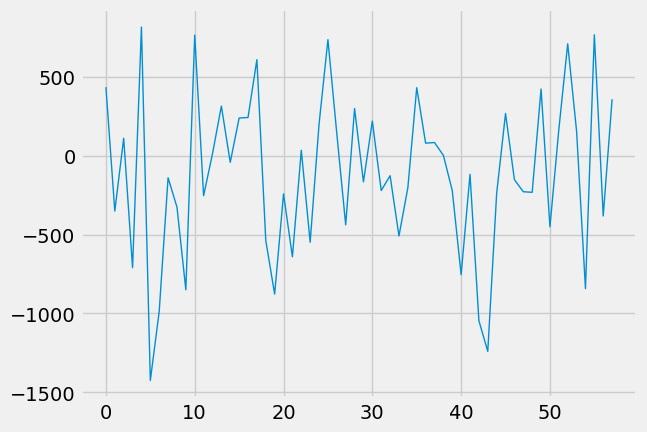

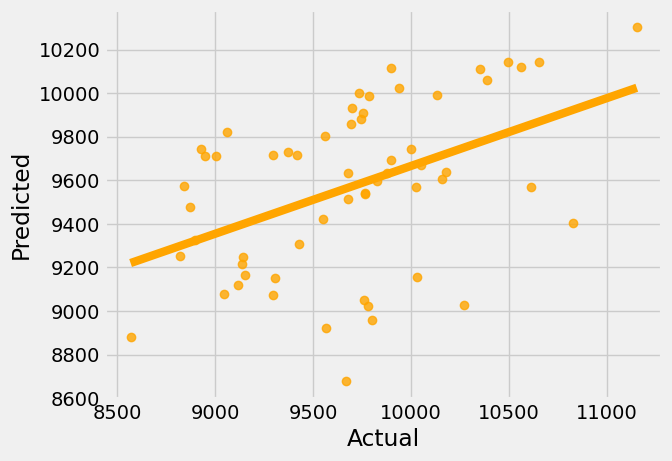

RMSE: 524.4351245168608
R-Squared: 0.09644999037269253
Coefficients: [-1.02706489e+02 -2.58537037e-05 -5.94725193e-04]


In [81]:
normalise = False
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 42)
rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)


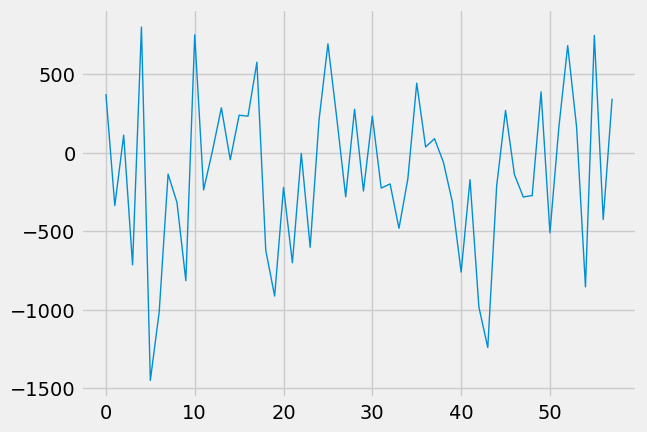

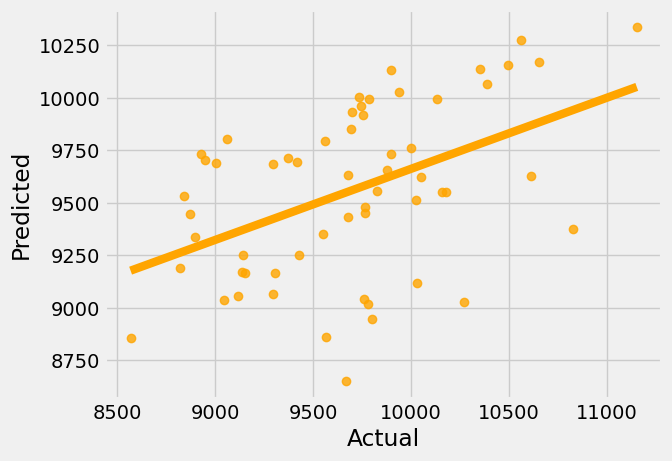

RMSE: 526.0433635414364
R-Squared: 0.09089981875980013
Coefficients: [-8.50446721e+08 -6.35320231e+03 -1.52184346e+04]


In [82]:
normalise = True
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 42)
rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)

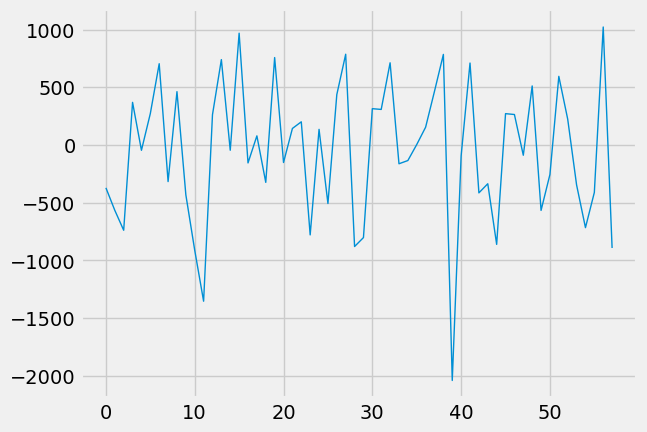

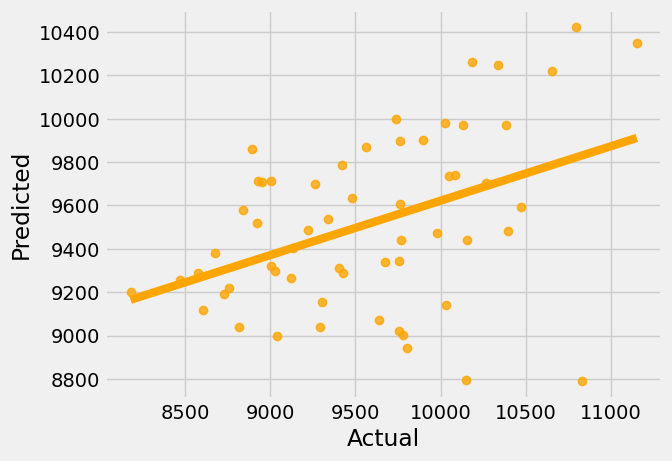

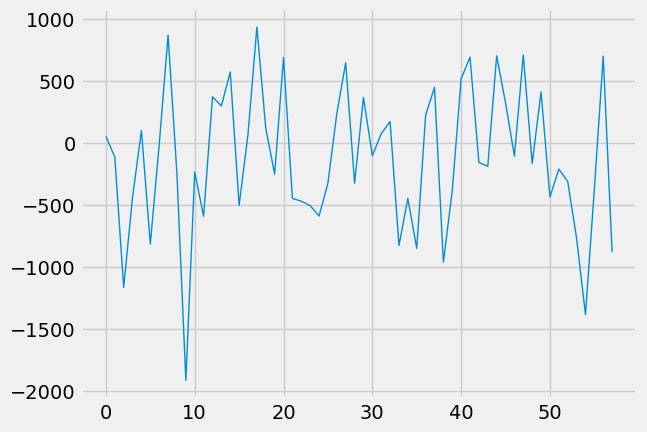

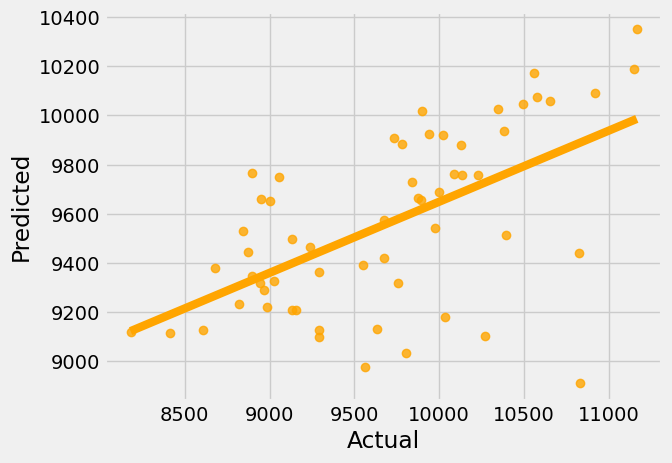

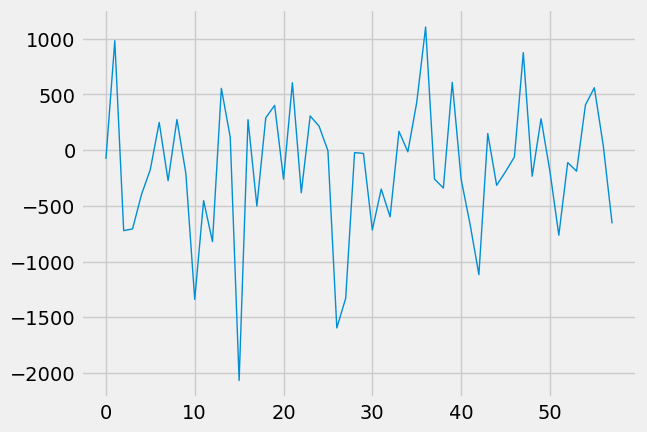

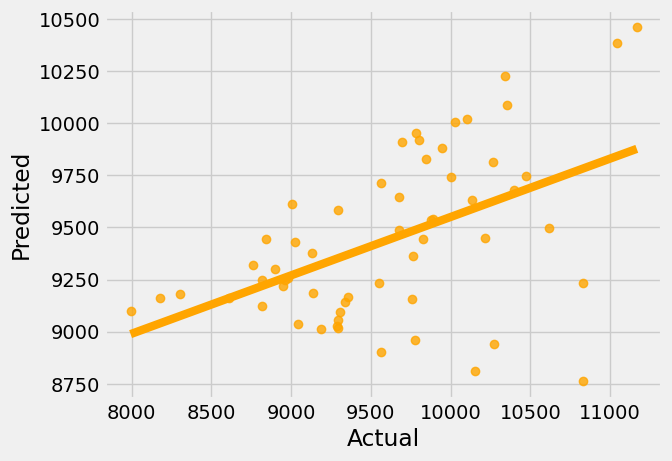

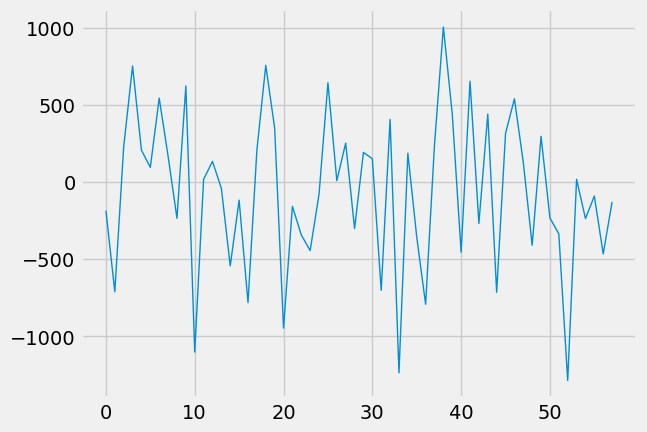

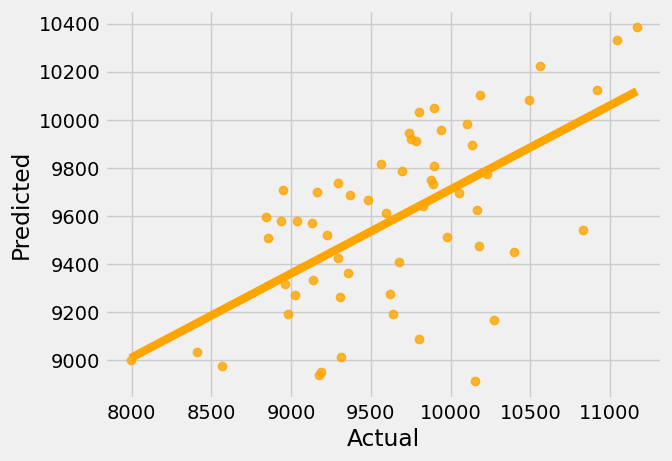

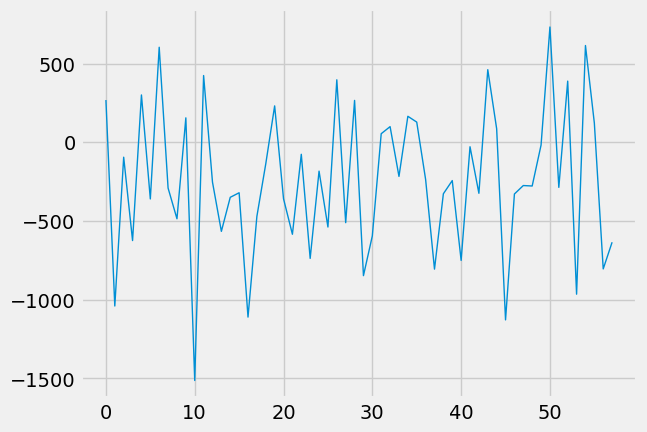

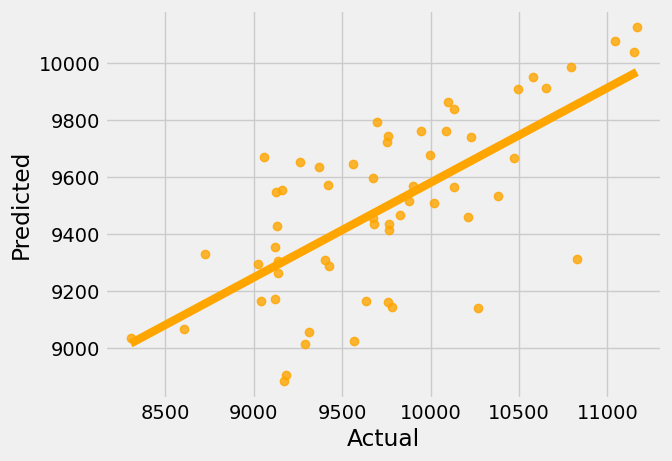

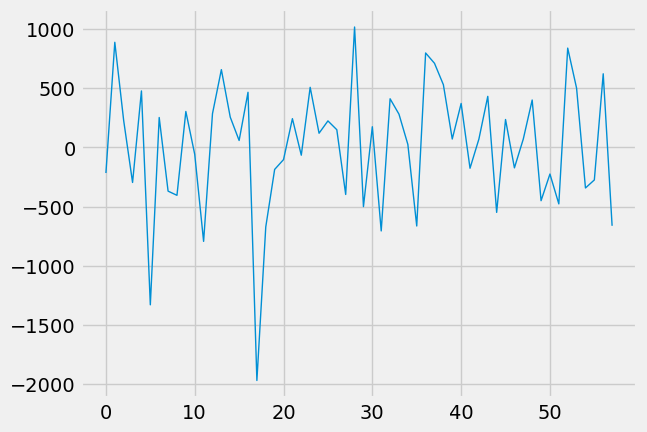

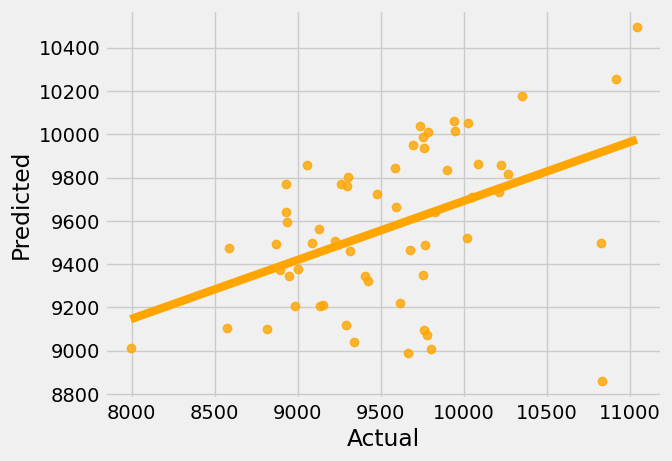

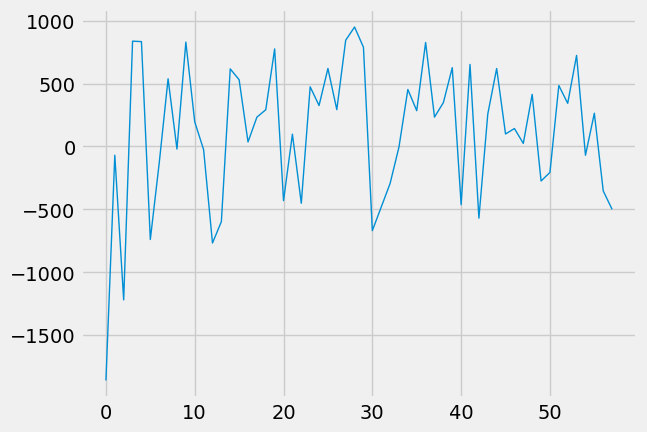

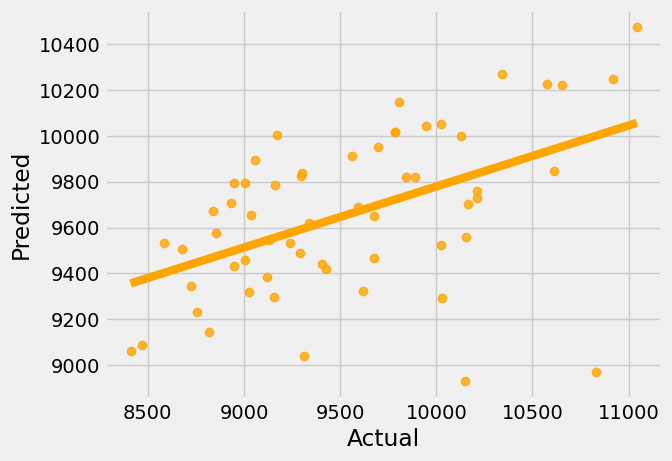

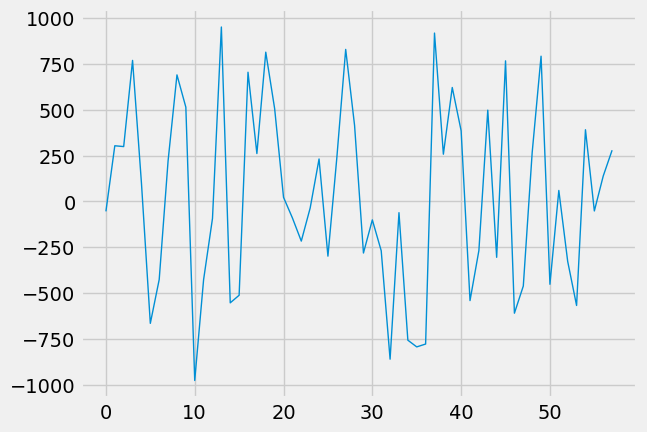

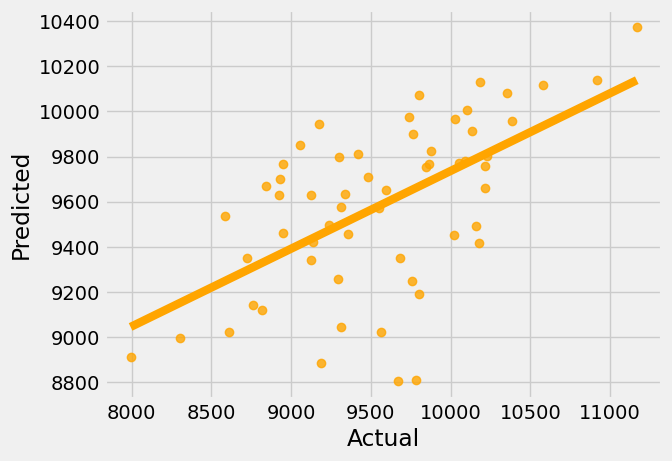

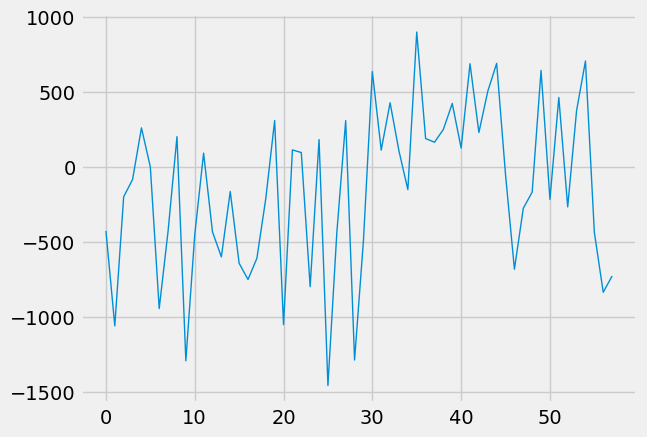

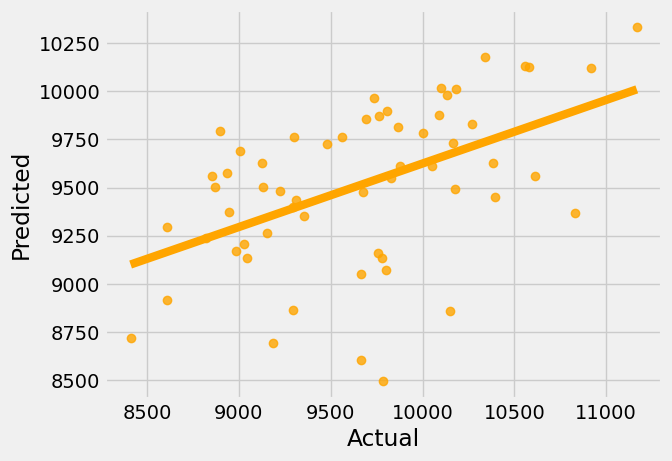

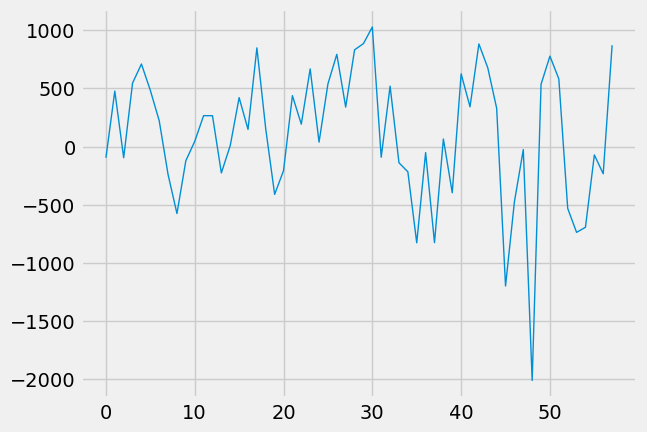

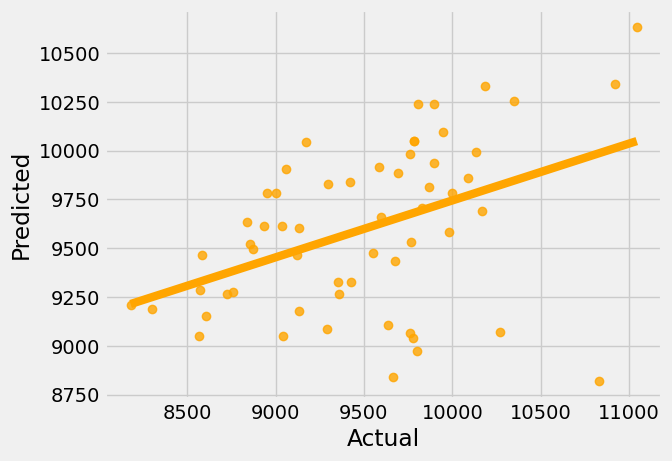

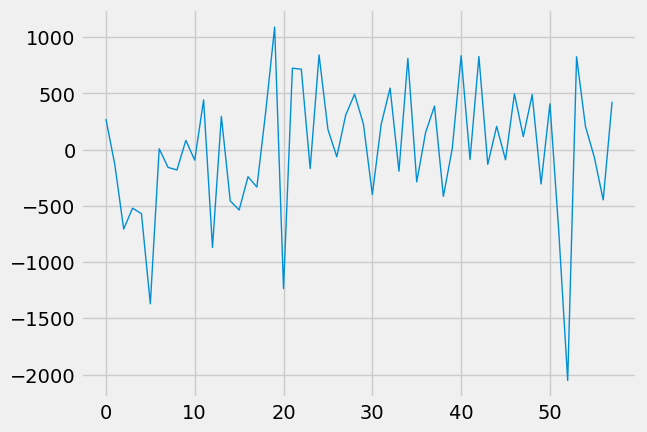

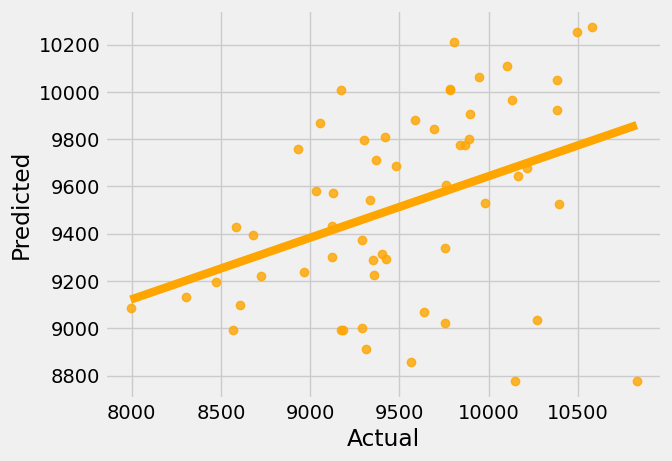

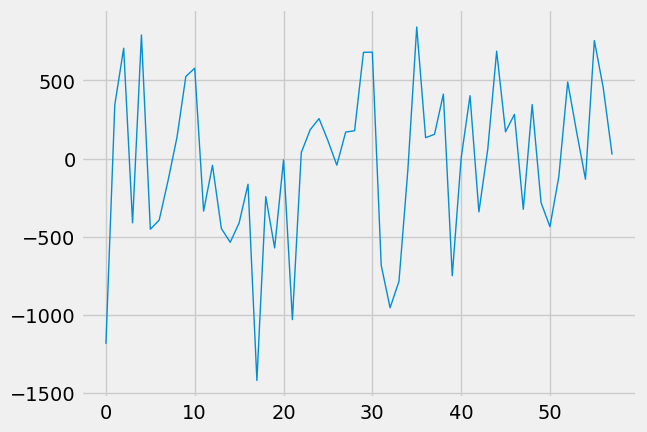

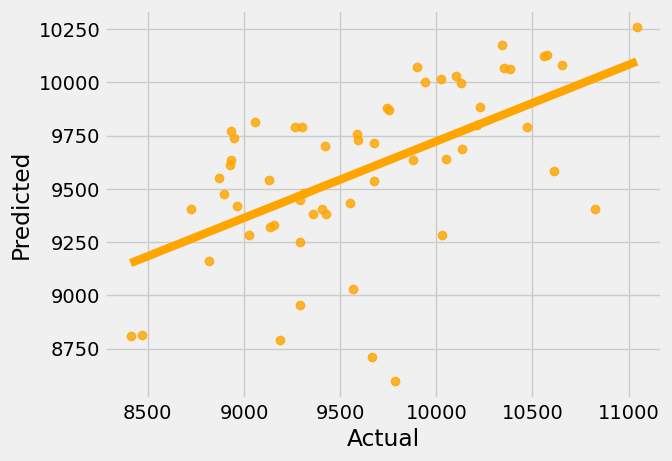

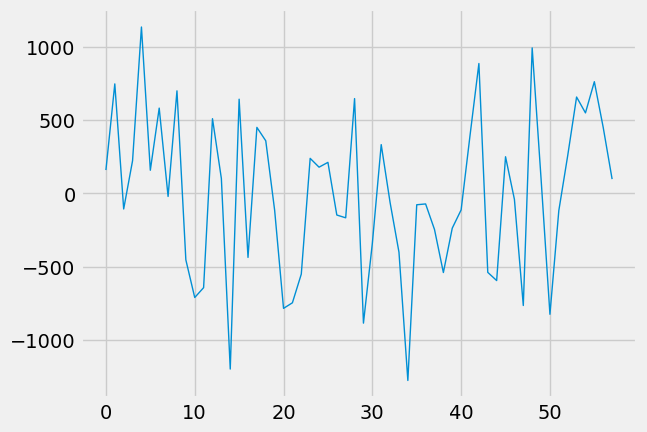

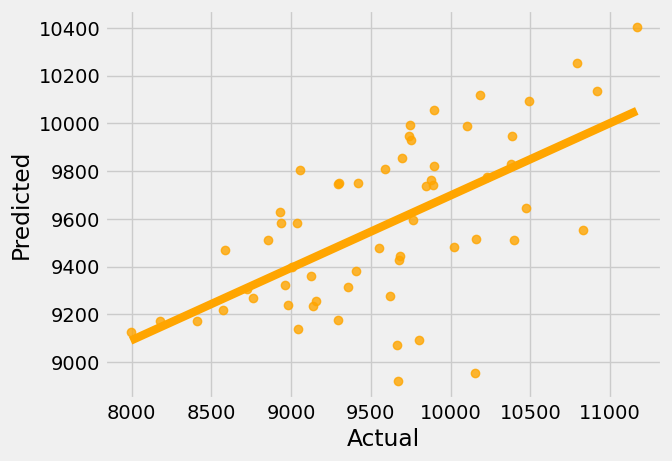

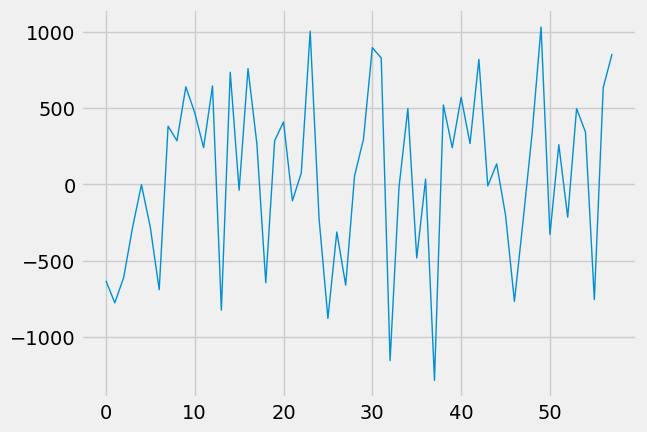

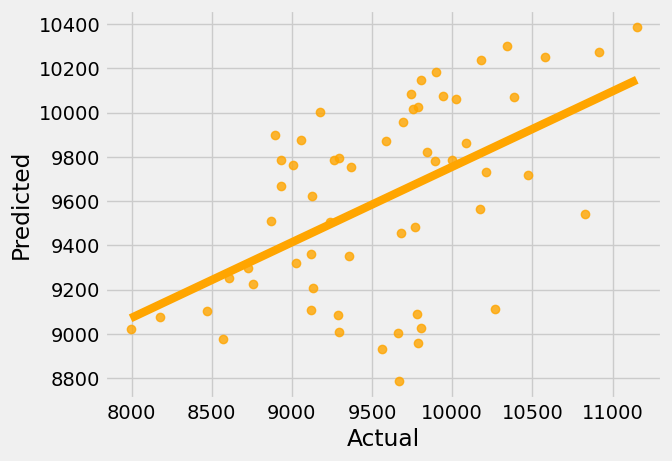

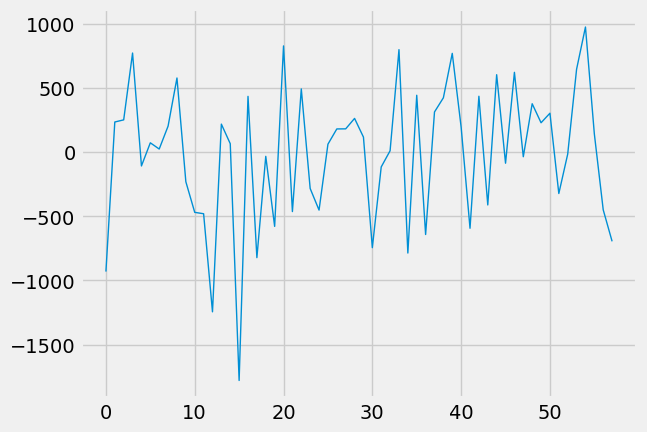

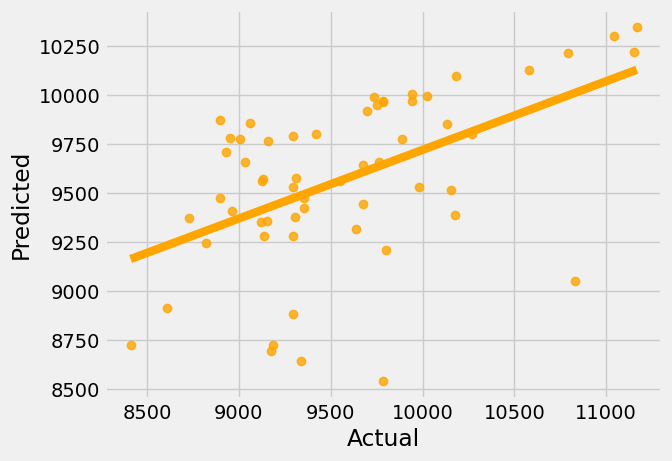

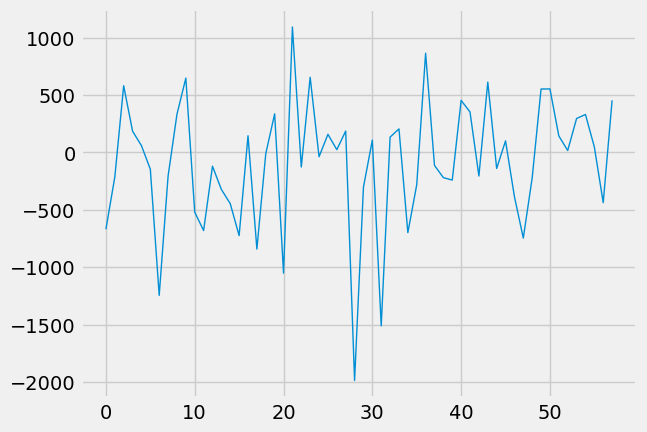

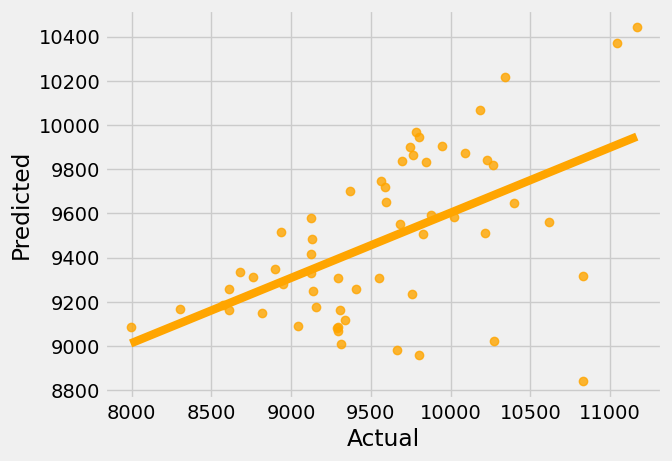

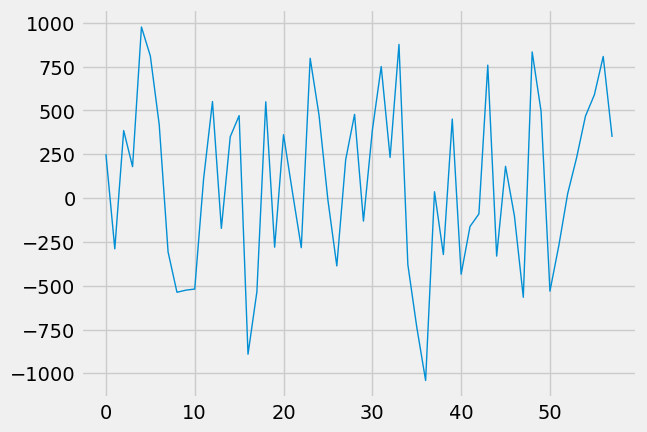

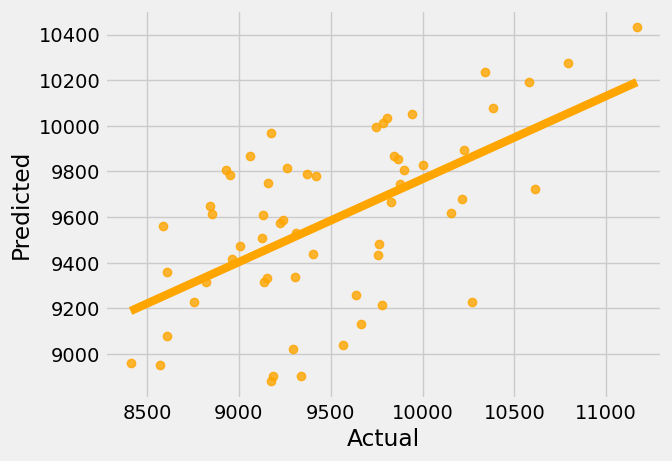

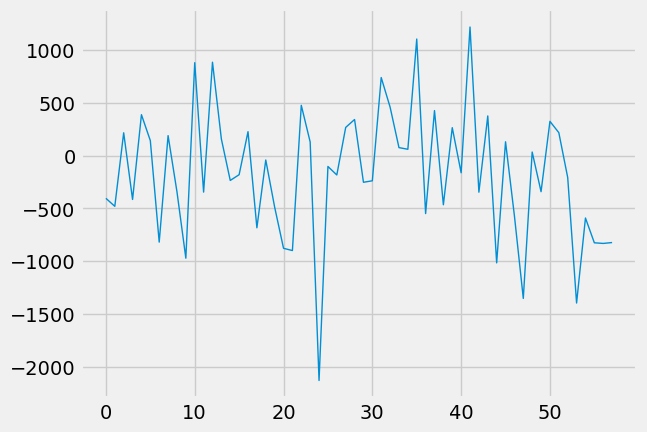

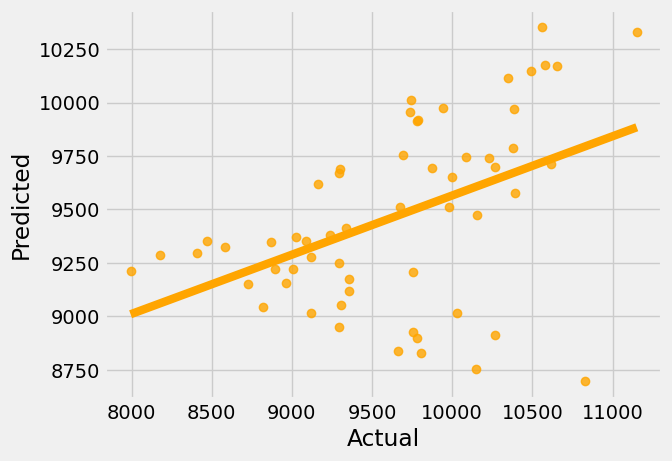

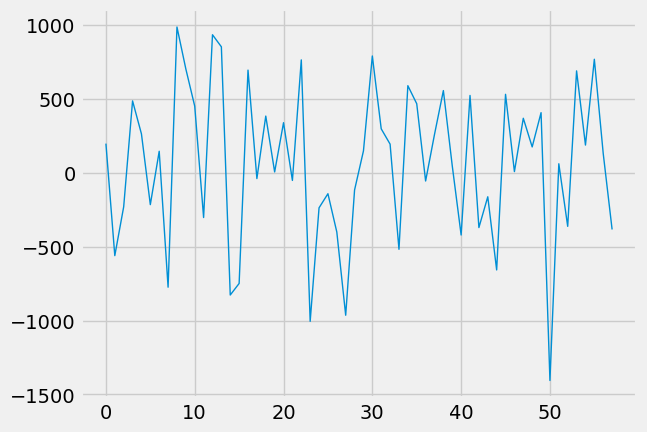

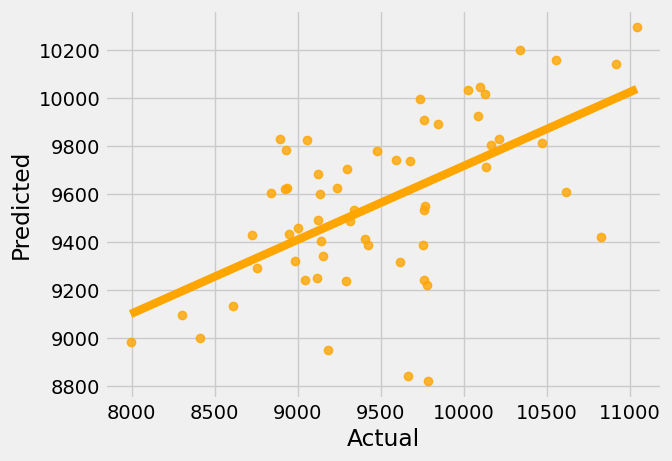

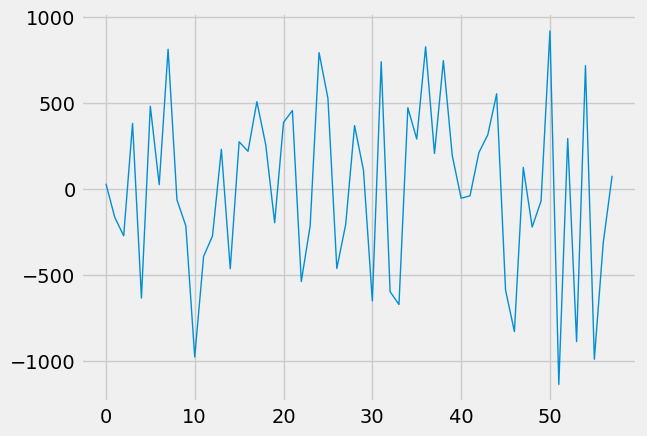

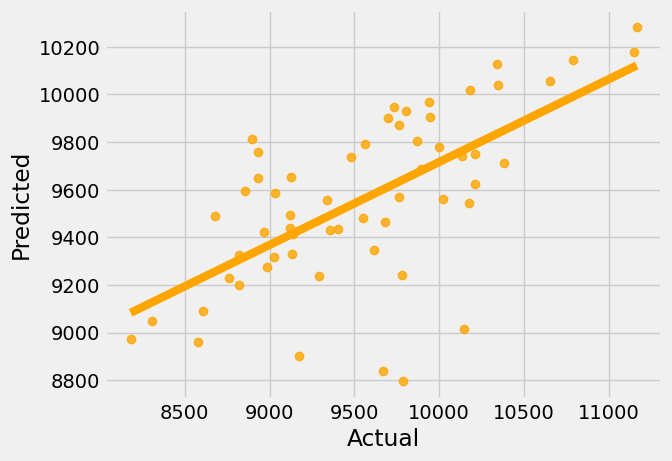

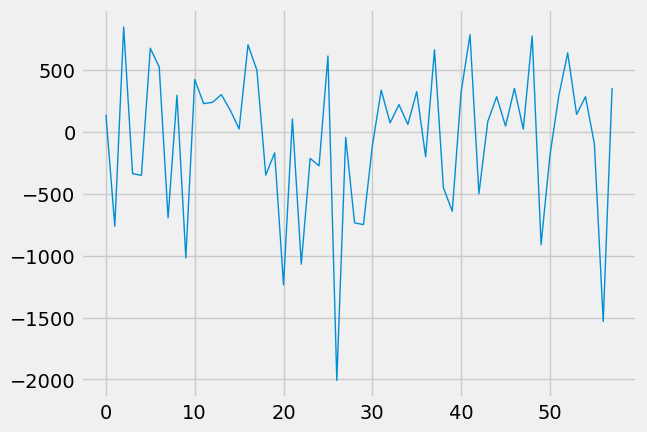

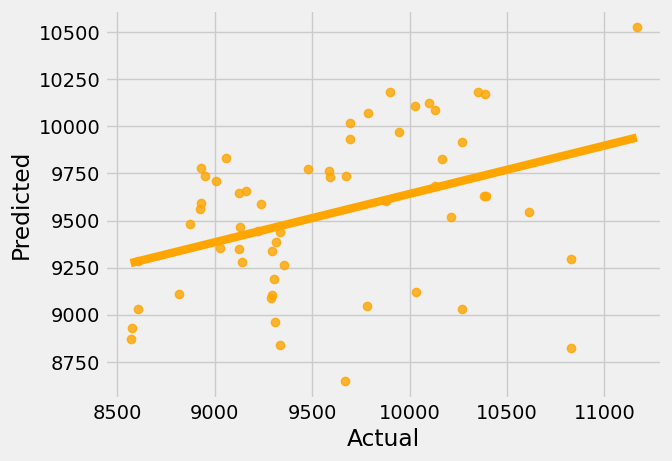

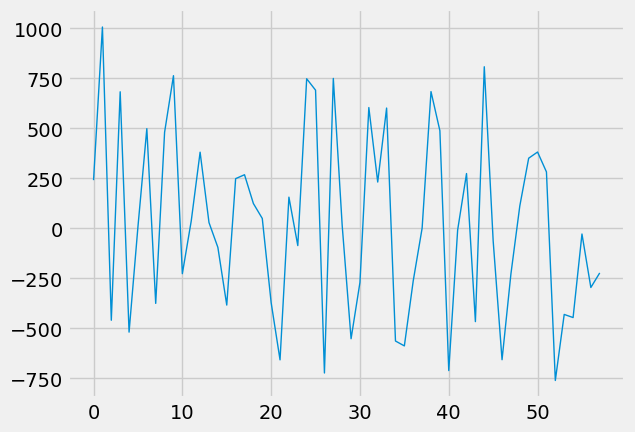

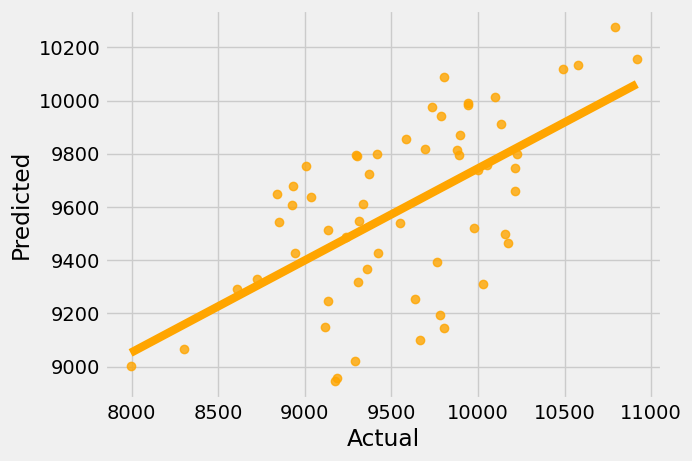

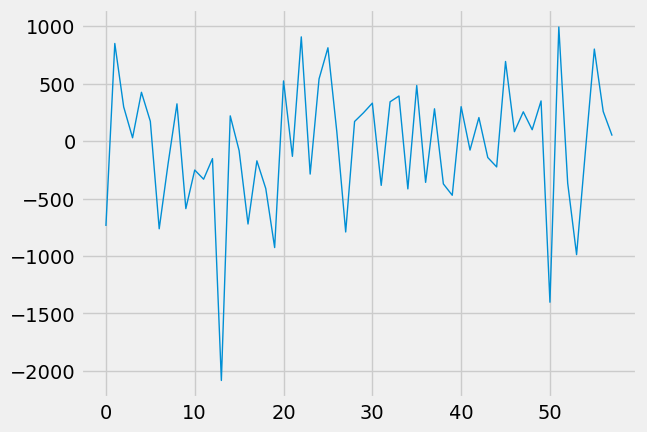

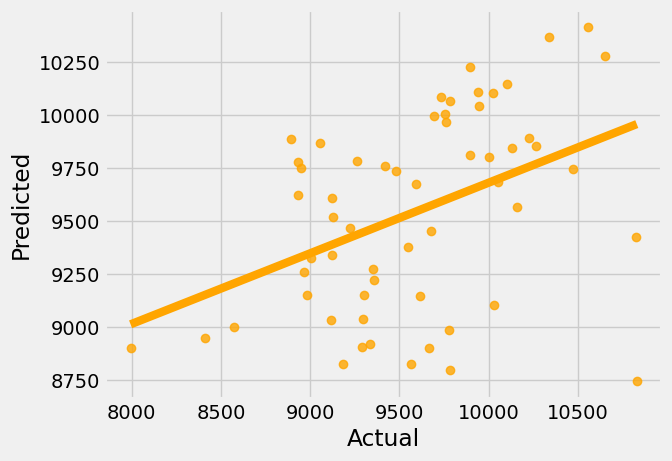

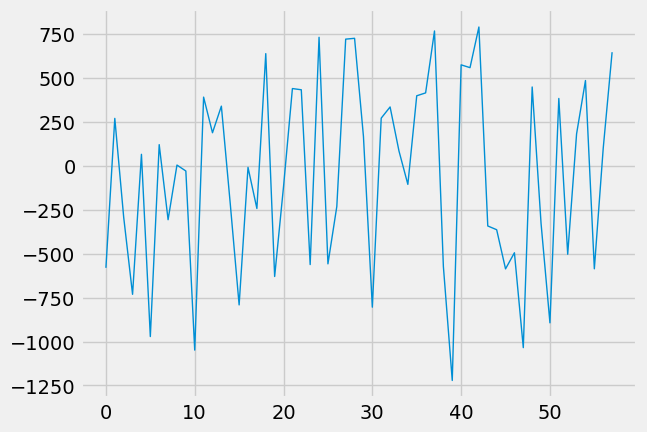

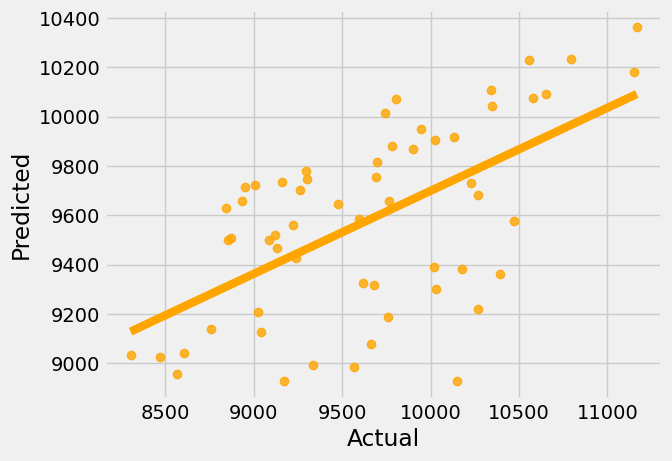

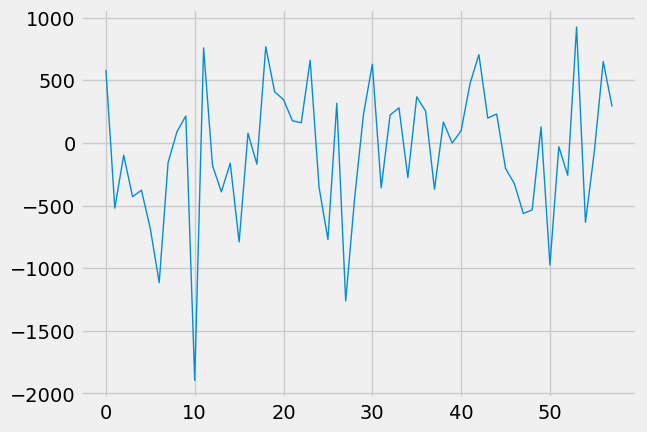

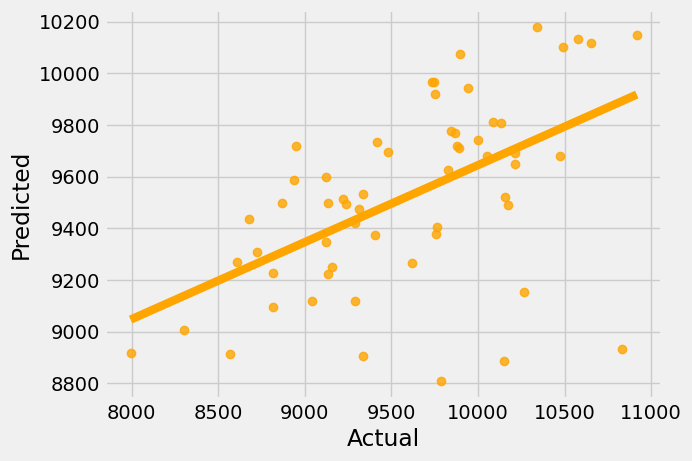

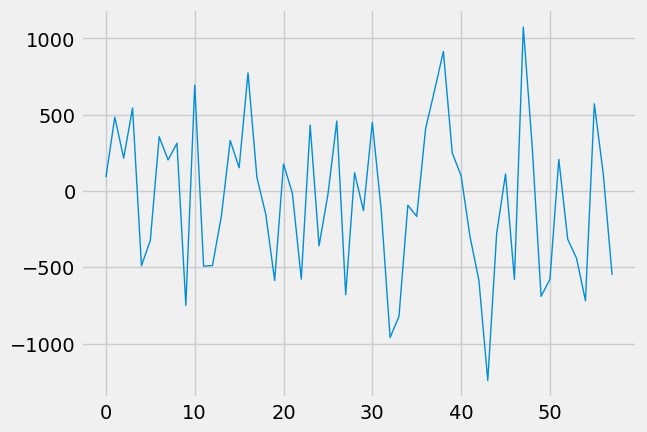

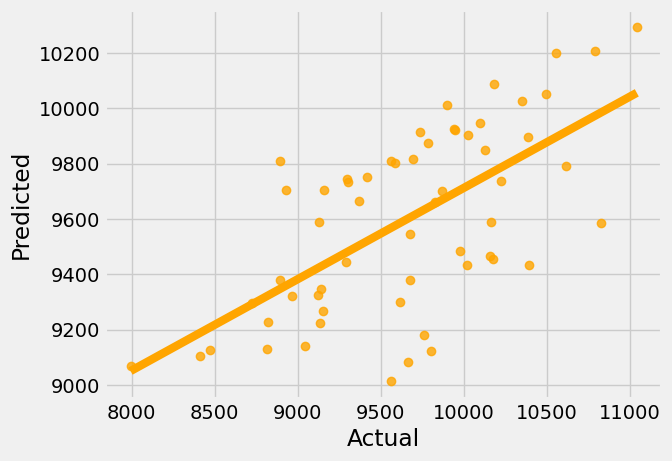

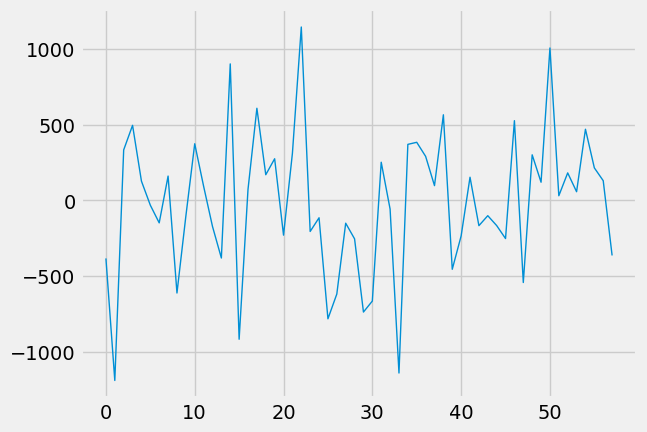

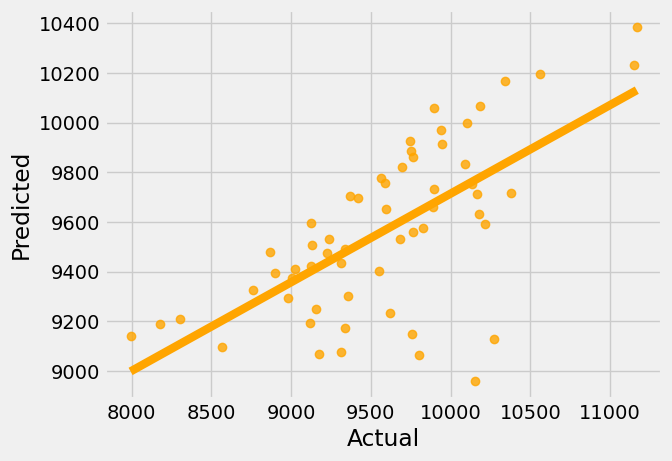

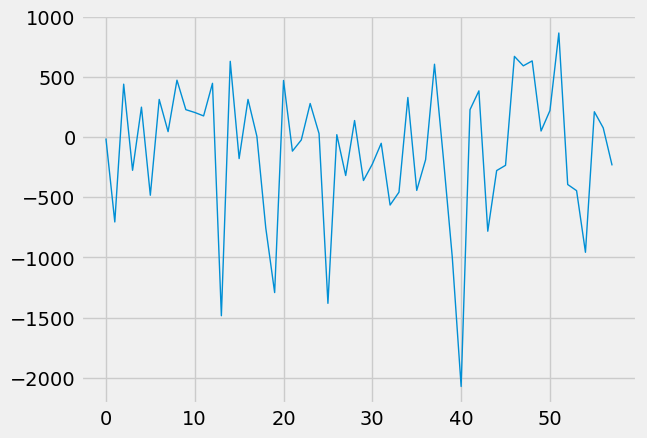

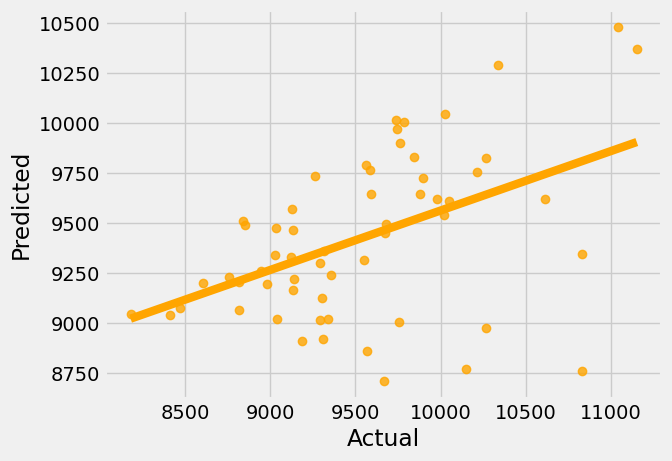

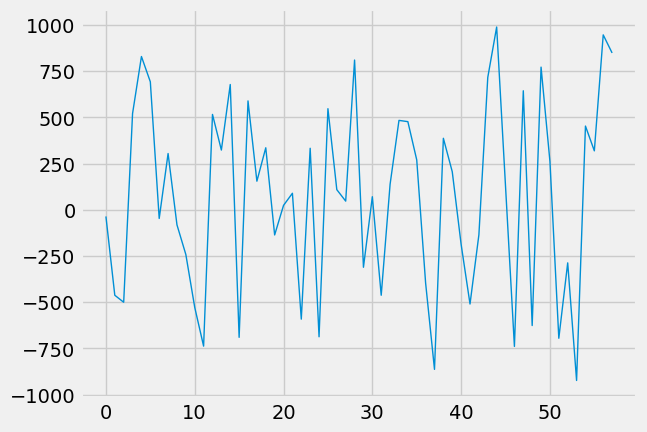

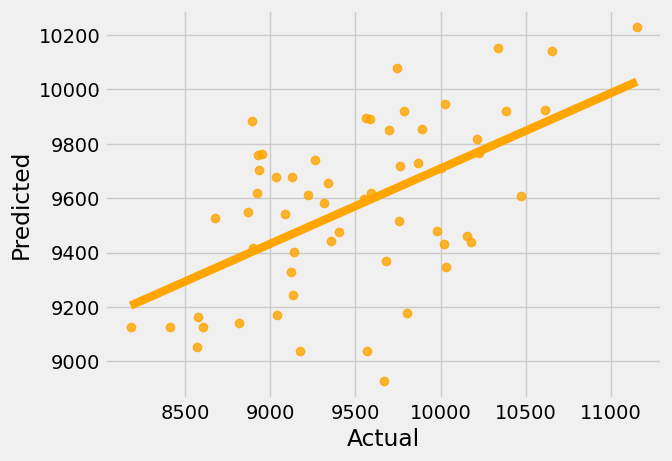

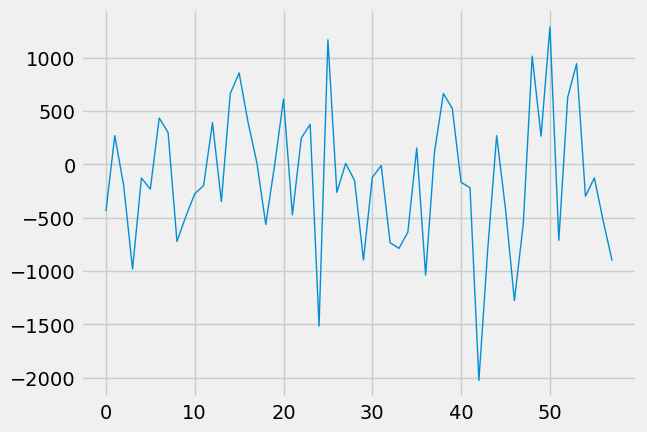

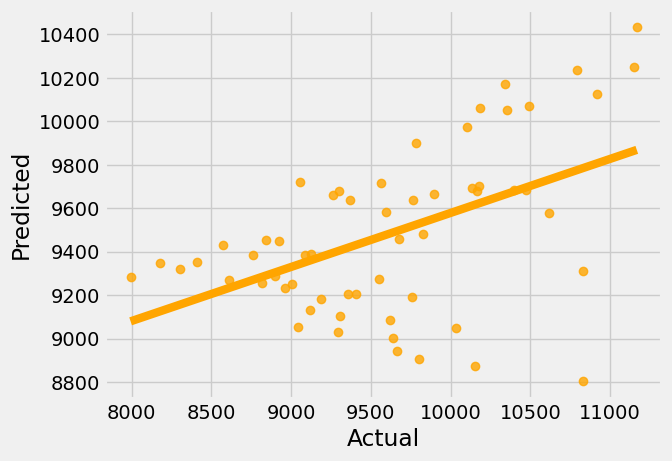


 List of RMSE:
 [608.42517719 596.14273256 625.31870666 511.60248092 533.87469774
 543.17861878 573.36750955 509.54435482 571.95845239 588.45498141
 581.32773795 510.29425307 547.09340119 570.16794164 546.67109686
 570.06073095 496.21449692 646.64022452 534.17218709 509.57863578
 596.31118603 463.18524539 570.05564825 541.50881259 545.93742594
 500.9632994  474.6394857  588.39940132 521.09908501 668.39982654]

 List of R^2:
 [0.13997232 0.29746225 0.18323469 0.36110075 0.27467489 0.17476781
 0.2075088  0.33814276 0.1648267  0.09495791 0.06973308 0.3142746
 0.35611257 0.24922764 0.24012116 0.26858176 0.32110662 0.12284456
 0.32768686 0.40651327 0.06811554 0.3634812  0.03356812 0.34057553
 0.27502741 0.38805328 0.42371208 0.16280545 0.29075288 0.21506276]

 mean_rmse:  554.8195944720603 
 std_rmse: 47.79506780983261

 mean_rsq: 0.24913350832969272 
 std_rsq: 0.10641304232017755


In [83]:
max_exp = 30
rmse_list = np.zeros(max_exp)
rsq_list = np.zeros(max_exp)

for i in range(0,max_exp):

    x_train, x_test, y_train, y_test = get_data(datafile, normalise, i)
    rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)

    rmse_list[i] = rmse
    rsq_list[i] = rsquared 


print('\n List of RMSE:\n', rmse_list)
# Explained variance score: 1 is perfect prediction 
print('\n List of R^2:\n', rsq_list)

mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)

mean_rsq = np.mean(rsq_list)
std_rsq = np.std(rsq_list)

print('\n mean_rmse: ', mean_rmse, '\n std_rmse:', std_rmse)
print('\n mean_rsq:', mean_rsq, '\n std_rsq:', std_rsq )

### Linear Model with regularisation, RandomForestRegressor and GradientBoostingRegressor model 

In [84]:
X = Meandemand.iloc[:,[0,2,3]].values
y = Meandemand.iloc[:, 1].values

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [86]:

pipelines={
'rf':make_pipeline(RandomForestRegressor(random_state=42)),
'gb':make_pipeline(GradientBoostingRegressor(random_state=42)),
'ridge':make_pipeline(Ridge(random_state=42)),
'lasso':make_pipeline(Lasso(random_state=42)),
'enet':make_pipeline(ElasticNet(random_state=42)),
}

In [87]:
hyperparagrid={
'rf':{
'randomforestregressor__min_samples_split':[2,4,6],
'randomforestregressor__min_samples_leaf':[1,2,3]
},
    
'gb':{
    'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},

'ridge':{
    'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'lasso':{
    'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'enet':{
    'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
}

}

In [88]:
fit_models={}
for algo,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparagrid[algo],cv=10,n_jobs=-1)
    try:
        print('Start training for {}'.format(algo))
        model.fit(X_train,y_train)
        fit_models[algo]=model
    except NotFittedError as e:
        print(repr(e))

Start training for rf
Start training for gb
Start training for ridge
Start training for lasso
Start training for enet


In [89]:
for algo,model in fit_models.items():
    ya=model.predict(X_test)
    print('{} scores-R2:{} MAE:{}'.format(algo,r2_score(y_test,ya), mean_absolute_error(y_test,ya)))

rf scores-R2:0.8041680184682305 MAE:151.8735765942866
gb scores-R2:0.8175920610380187 MAE:147.41306729152436
ridge scores-R2:0.2995689378862836 MAE:281.61993092391975
lasso scores-R2:0.2995691325513321 MAE:281.6199073959774
enet scores-R2:0.29958605627520174 MAE:281.61786182849926


In [90]:
best_model=fit_models['gb']

In [91]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('gradientboostingregressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'gradientboostingregressor__alpha': [0.001, 0.005,
                                                              0.01, 0.05, 0.1,
                                                              0.5, 0.99]})